# Metadata

```yaml
Course:   DS 5001 Exploratory Text Analytics
Module:   01 Getting Started
Topic:    Lab: Further Exploration
Author:   R.C. Alvarado
Date:     17 October 2022 (revised)
```

**Purpose**:  We continue exploring the Gutenberg text, looking at simple word dispersion plots and correlations.

# Set Up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set()

# Retrieve Work

In [3]:
K = pd.read_csv("ff-TOKENS.csv")[['term_str']]
V = pd.read_csv("ff-VOCAB.csv").set_index('term_str')

# Word Dispersion Plots

We create a simple dispersion plot to show the distribution of words over narrative time.


In [4]:
K.head()

,term_str
0,persuasion
1,by
2,jane
3,austen
4,1818


In [5]:
D = pd.get_dummies(K.term_str)

In [6]:
D.T.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,83273,83274,83275,83276,83277,83278,83279,83280,83281,83282
stuck,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
clumsy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
requisitions,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
woody,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sunshine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


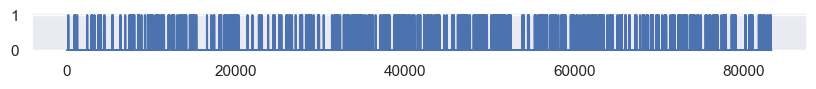

In [7]:
D['anne'].plot(figsize=(10, .5));

In [8]:
def word_plot(term_str):
    term_str = term_str.lower()
    D[term_str].plot(figsize=(10, .5), legend=False, title=term_str.upper());

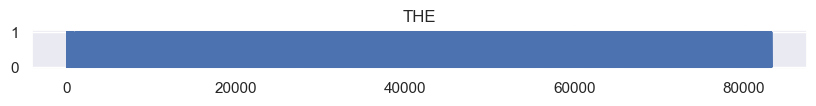

In [9]:
word_plot('the')

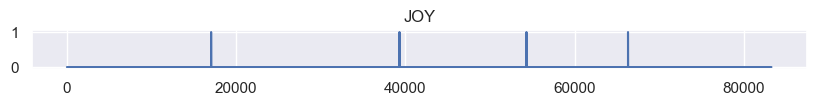

In [10]:
word_plot('joy')

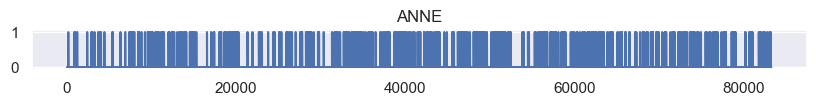

In [11]:
word_plot('anne')

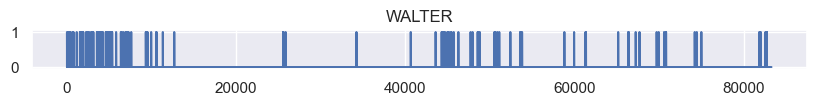

In [12]:
word_plot('walter')

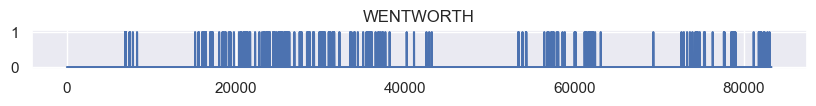

In [13]:
word_plot('wentworth')

# Correlation Graphs

We chunk narrative time into 100 segments of equal length (centiles). 

Then we count how many times each word appears in each centile.

Then we compare plots for pairs of words.

In [14]:
K['centile'] = (K.index * 100 / len(K)).astype('int') + 1

In [15]:
# K.centile.value_counts().value_counts() # View chunk sizes

In [16]:
M = [None, None]
M[0] = K.groupby(['centile','term_str']).term_str.count().unstack(fill_value=0)
M[1] = M[0] / M[0].sum()

In [17]:
M[1].T.sample(10)

centile,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
term_str,,,,,,,,,,,,,,,,,,,,,
hastily,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0
owed,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
incurious,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
smallest,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
dripping,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
nervous,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
fatal,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
cottagers,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
vacancies,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


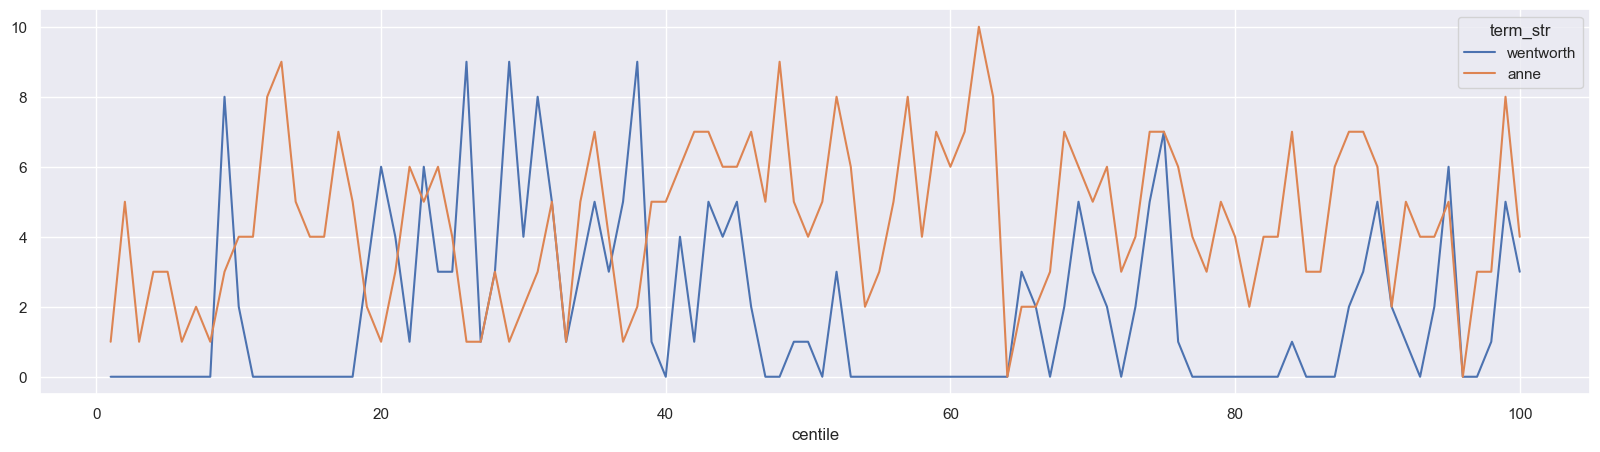

In [18]:
M[0][['wentworth','anne']].plot(figsize=(20,5), style='-');

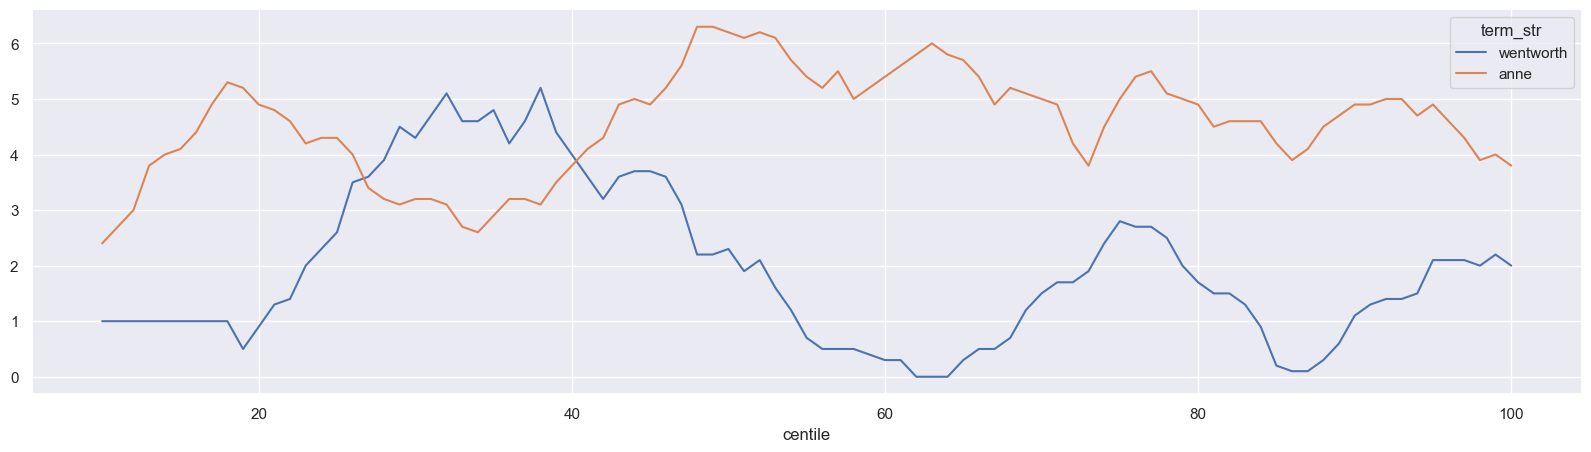

In [19]:
M[0][['wentworth','anne']].rolling(10).mean().plot(figsize=(20,5));

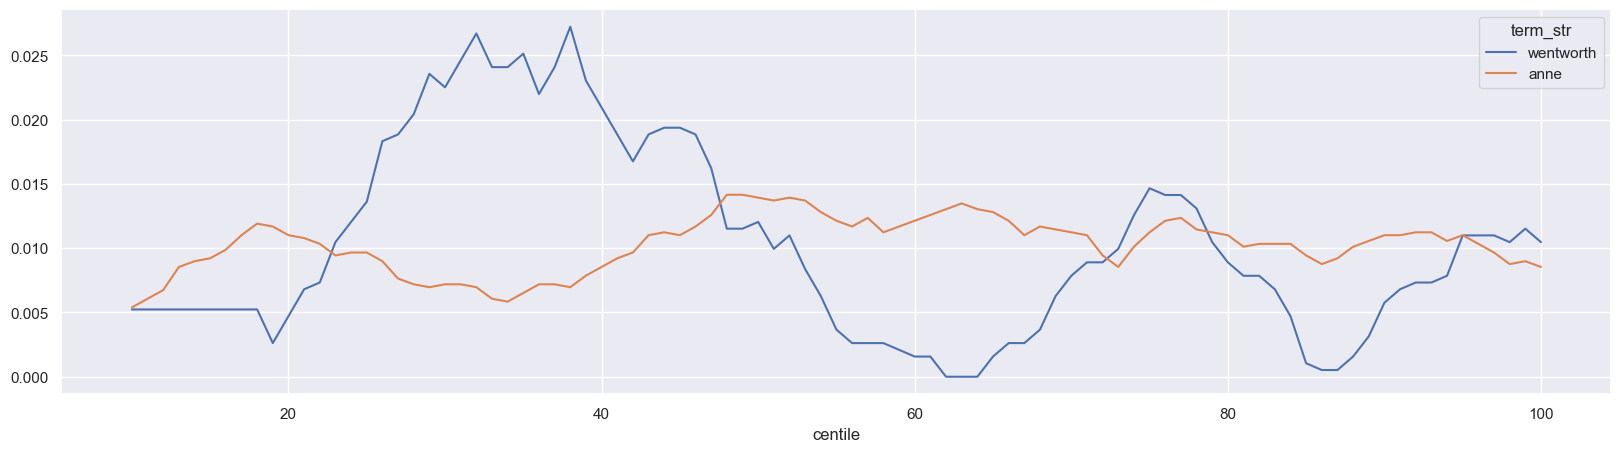

In [20]:
M[1][['wentworth','anne']].rolling(10).mean().plot(figsize=(20,5));

In [21]:
def plot_words(words, rolling=True, w=10, norm=1):
    config = {
        'figsize': (20, 5),
        'title': f"{', '.join(words).upper()} (norm={norm})"
    }
    if rolling:
        M[norm][words].rolling(w).mean().plot(**config);
    else:
        M[norm][words].plot(**config);

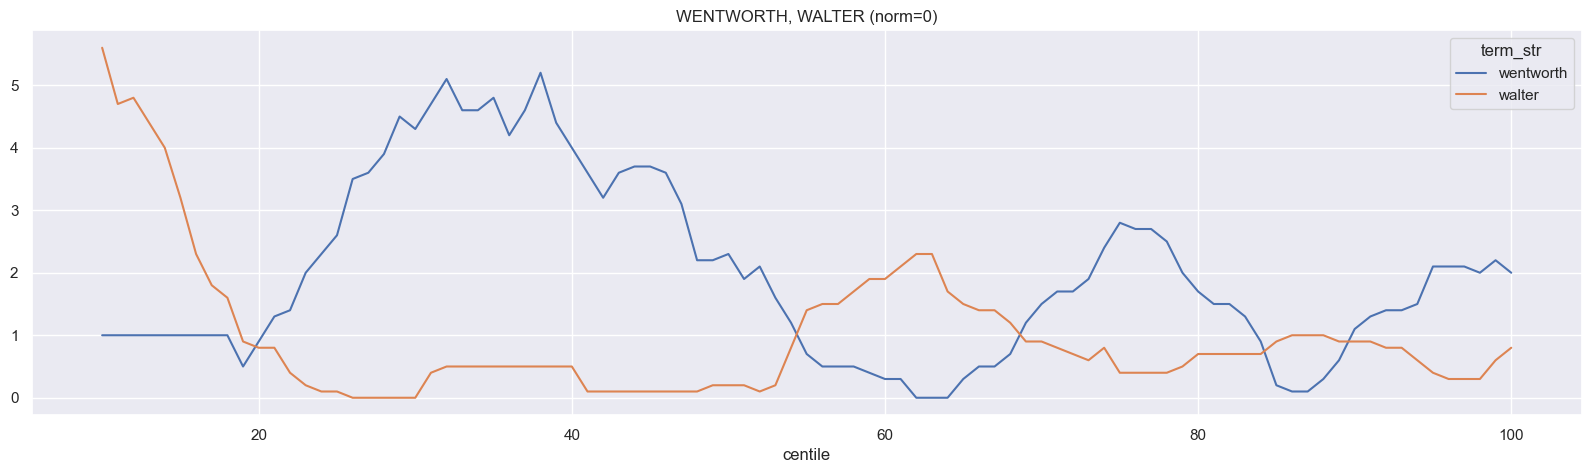

In [22]:
plot_words(['wentworth','walter'], norm=0)

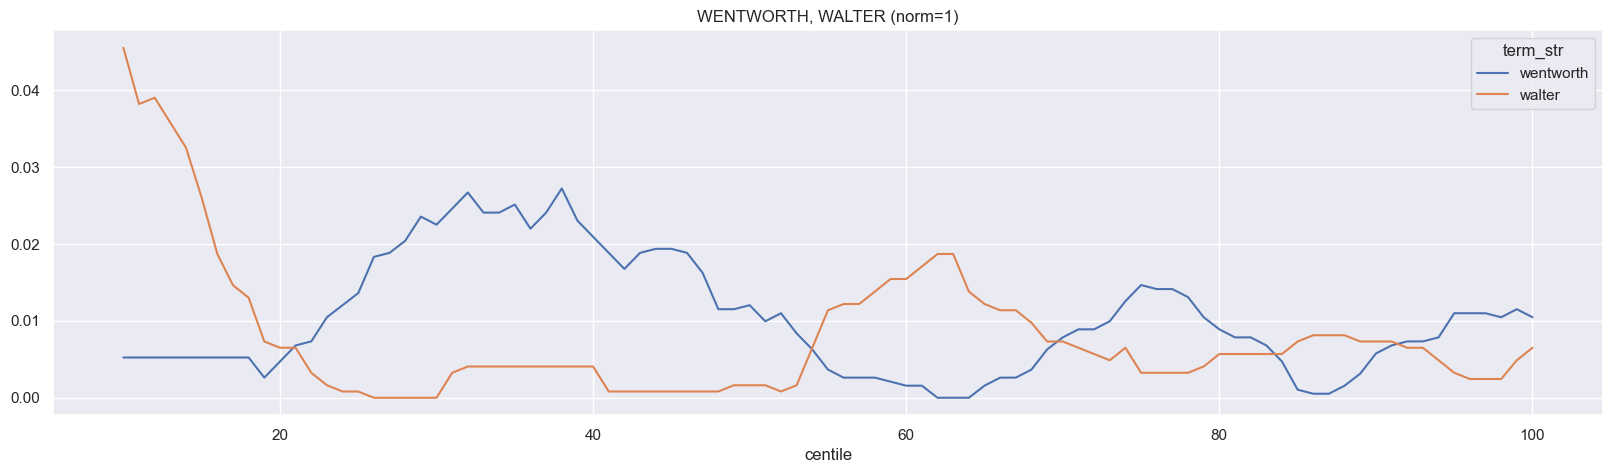

In [23]:
plot_words(['wentworth','walter'])

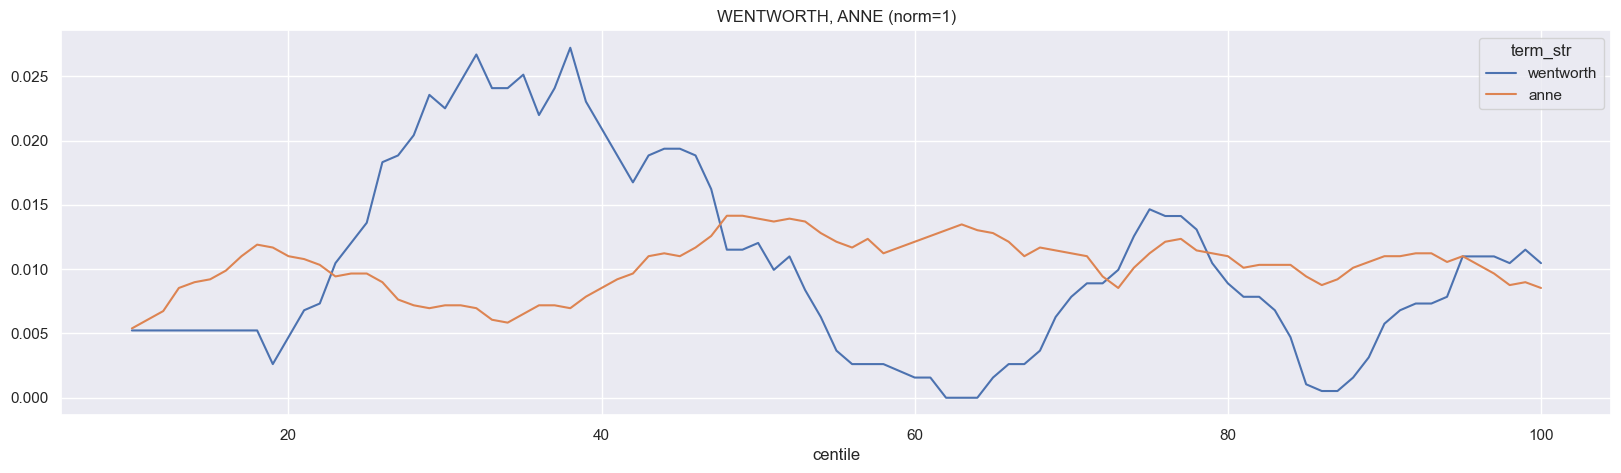

In [24]:
plot_words(['wentworth','anne'])

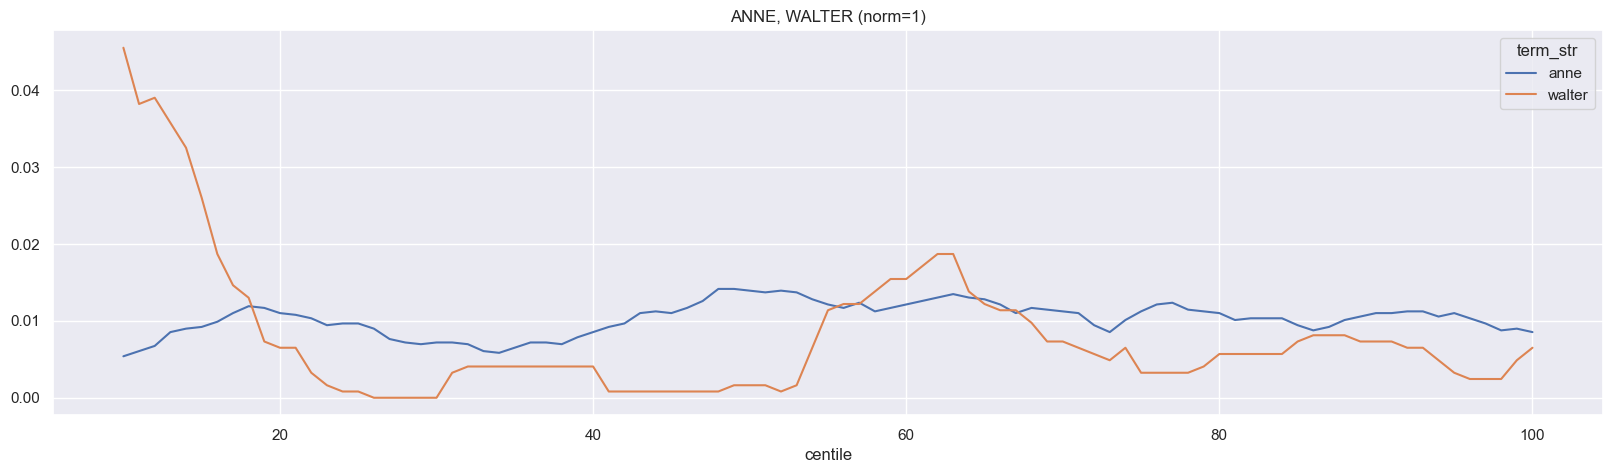

In [25]:
plot_words(['anne','walter'])

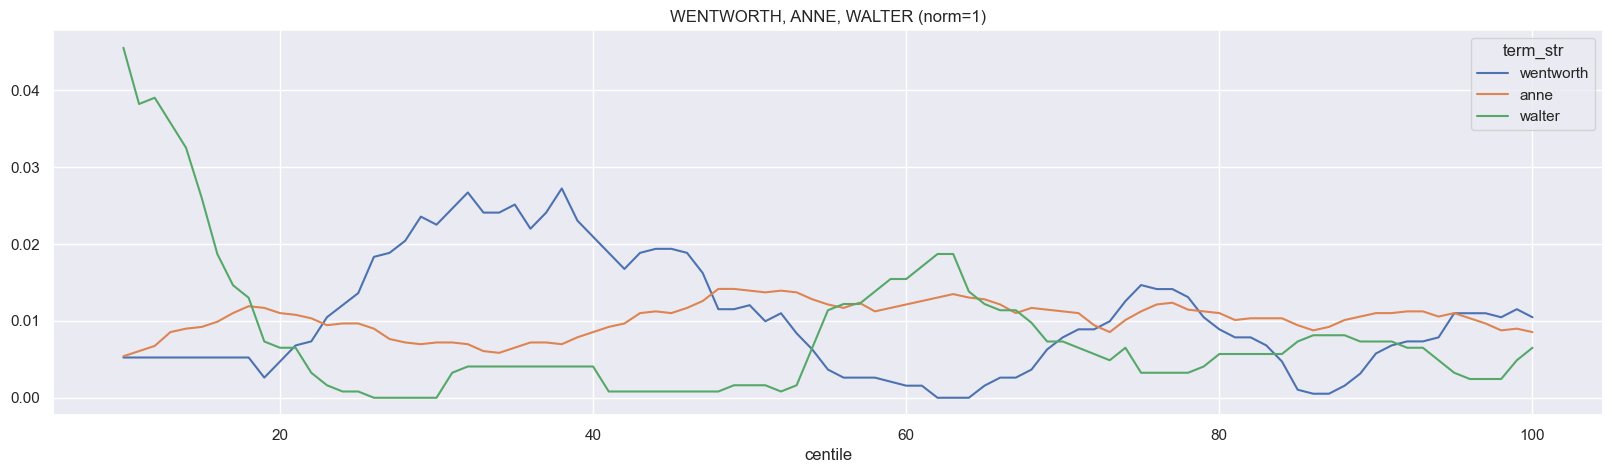

In [26]:
plot_words(['wentworth', 'anne', 'walter'])

# Using `corr()`

We use Pandas' correlation method `corr()` to craete a correlation matrix of words. 

We remove stopwords first.

In [28]:
stopwords = [word.strip() for word in open("../data/misc/stop_words_english.txt", 'r').readlines()]

In [29]:
print(stopwords[:10])

['able', 'about', 'above', 'abroad', 'according', 'accordingly', 'across', 'actually', 'adj', 'after']


In [32]:
V2 = [word for word in M[1].columns if word not in stopwords]

In [33]:
Q = M[1][V2]\
    .corr(method='kendall')\
    .stack()\
    .sort_values()\
    .to_frame('c')
Q.index.names = ['w0', 'w1']
Q = Q.query('w0 != w1')

In [ ]:
Q

In [ ]:
def corr_words(word, n=10):
    C = Q.loc[word].c
    pd.concat([C.head(n), C.tail(n)]).plot.barh(title=word.upper(), figsize=(5, n))
    plot_words([word, C.idxmax(), C.idxmin()])

In [ ]:
walter = corr_words('walter')

In [ ]:
anne = corr_words('anne')

In [ ]:
wentworth = corr_words('wentworth')